## Step 1: Setting up the Environment (Excel Engine)
Concept: Unlike CSVs, Pandas requires an additional "engine" called openpyxl to read and write modern
Excel files. 

In [2]:
#Import the following libraries for data analysis and visualization:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Loading the Excel file
# Note: If the file has multiple sheets, specify: sheet_name='Sales2026'
df = pd.read_excel('commercial_sales.xlsx')
# Initial diagnosis to see a summary of the dataset, including data types and non-null counts
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order Date        100 non-null    datetime64[ns]
 1   Product           100 non-null    object        
 2   Quantity Ordered  100 non-null    int64         
 3   Price Each        100 non-null    int64         
 4   City              100 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 4.0+ KB
None


By this first step, we have loaded the dataset and performed an initial diagnosis to understand its structure and identify any potential issues with missing wich is not the case in this dataset.

-- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . 






## Step 2: Data Wrangling (Cleaning and Preparation)
Concept: Commercial data often comes with complex date formats. We need to extract the Month to
analyze seasonality and calculate the total revenue per transaction.

In [10]:
for i in range(5):
    print(df['Order Date'].iloc[i])


2025-01-15 00:00:00
2025-02-10 00:00:00
2025-03-05 00:00:00
2025-04-20 00:00:00
2025-12-20 00:00:00


We can see that the format with which the 'Order Date' variable is presented is too long, so in this case we will change the format so that the times do not appear

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order Date        100 non-null    datetime64[ns]
 1   Product           100 non-null    object        
 2   Quantity Ordered  100 non-null    int64         
 3   Price Each        100 non-null    int64         
 4   City              100 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 4.0+ KB


As part of the data cleaning we will change as we have said the format of the variable 'Order Date' in addition with this new date format we will use the function dt.month name() to obtain the months and make analysis based on them. We will also create a new feature where we will calculate the total amount of money raised by the sale of each product.

In [7]:
# Convert the 'Order Date' column to a datetime object
df['Order Date'] = pd.to_datetime(df['Order Date'])
# Extract the month name for seasonal analysis
df['Month'] = df['Order Date'].dt.month_name()
# Calculate Total Sales (Quantity * Price)
df['Sales Total'] = df['Quantity Ordered'] * df['Price Each']
print(df[['Order Date', 'Month', 'Sales Total']].head())

  Order Date     Month  Sales Total
0 2025-01-15   January          700
1 2025-02-10  February         4800
2 2025-03-05     March           30
3 2025-04-20     April          100
4 2025-12-20  December          150


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order Date        100 non-null    datetime64[ns]
 1   Product           100 non-null    object        
 2   Quantity Ordered  100 non-null    int64         
 3   Price Each        100 non-null    int64         
 4   City              100 non-null    object        
 5   Month             100 non-null    object        
 6   Sales Total       100 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 5.6+ KB


-- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . -- . 

## Step 3: Star Product Analysis (Visualization)
Concept: The Pareto Principle often applies in retail: 20% of products usually generate 80% of the revenue.

/tmp/ipykernel_61623/939620145.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='magma')


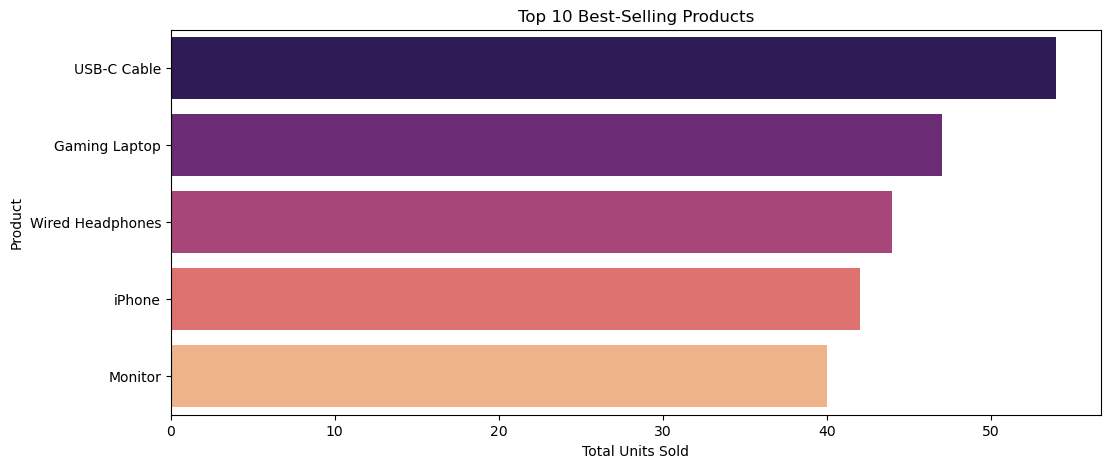

In [16]:
# Group by product and sum the quantities
top_products = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).head(10)
# Visualize the top 10 best-selling products
plt.figure(figsize=(12, 5))
# define the color palette for the bars
sns.barplot(x=top_products.values, y=top_products.index, palette='magma')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Units Sold')
plt.show()

We might wonder why there are only 5 products if we want to show the top 10.

If we take a closer look at the products, we will see that there are only 5 products

In [14]:
# Lista de productos:
products = df['Product'].unique()
print(products)

['iPhone' 'Gaming Laptop' 'USB-C Cable' 'Wired Headphones' 'Monitor']


## Step 4: Monthly Sales Trends (Seasonality)
Concept: When should the company spend more on advertising? 

Trend analysis answers this by identifying peak months.

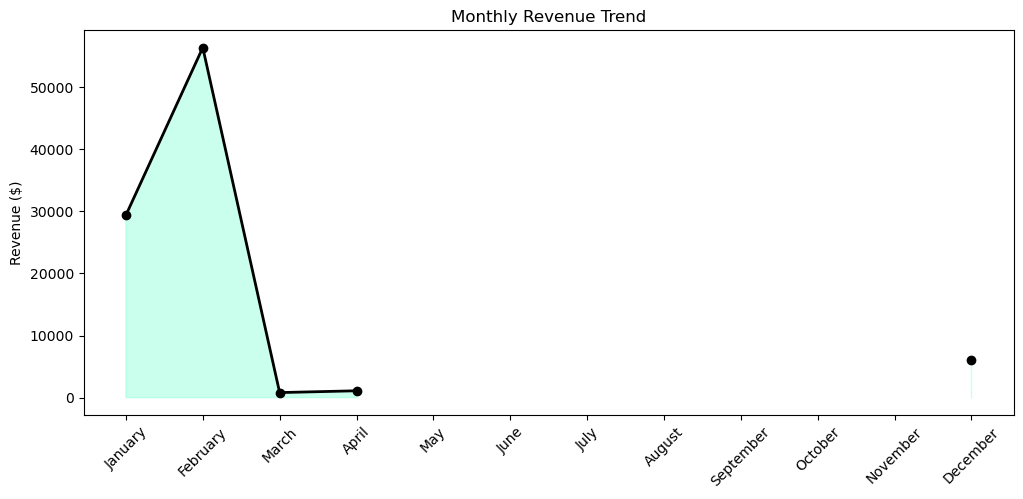

In [18]:
# Order months chronologically instead of alphabetically
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales = df.groupby('Month')['Sales Total'].sum().reindex(month_order)
# indicate the size of the figure and plot the line graph with markers and a filled area under the curve
plt.figure(figsize=(12, 5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='black', linewidth=2)
plt.fill_between(monthly_sales.index, monthly_sales.values, color='aquamarine', alpha=0.4)
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.ylabel('Revenue ($)')
plt.show()

#### Questions for the students:
1. Strategy. If a product has high sales volume but low "Sales Total," what marketing strategy would you suggest (increase the price or keep the volume)?
- We could increase the price to increase total sales, but thats a little radical I think it is better if a product should increase the value individually and not all of them


2. Operations. Based on the monthly trend, in which months would you recommend hiring temporary warehouse staff?
- January and February 

3. Technical. Why is it often more difficult to process an Excel file with multiple tabs compared to a simple CSV file?
- Beacuse the complexity increases due to how the data is structured and how memory is managed.

## 1. Average Ticket Calculation: Calculate the mean of the Sales Total column.

In [23]:
media = df['Sales Total'].mean()
print("The mean of total sales is:", media)



The mean of total sales is: 937.1


## 2. City Analysis: Create a bar chart showing revenue per City.

/tmp/ipykernel_48045/585087769.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_city.values, y=ventas_city.index, palette='viridis')


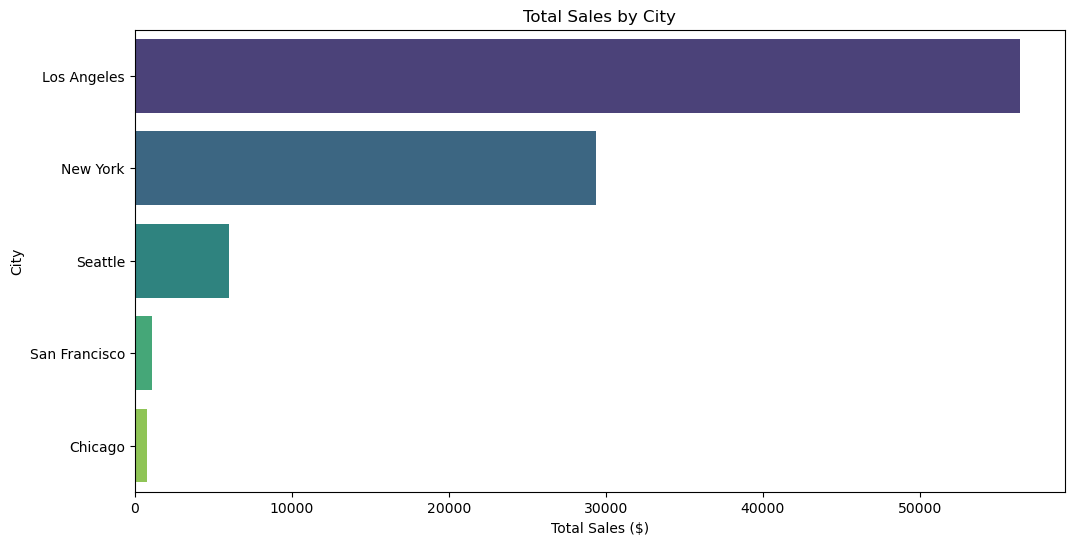

In [ ]:
# Group by city and sum the total sales, then sort in descending order
ventas_city = df.groupby('City')['Sales Total'].sum().sort_values(ascending=False) 
# Visualize total sales by city  
plt.figure(figsize=(12, 6))
sns.barplot(x=ventas_city.values, y=ventas_city.index, palette='viridis')
plt.title('Total Sales by City')
plt.xlabel('Total Sales ($)')
plt.show()

## Conclusions: 

After completing the analysis of the commercial sales dataset, it is evident that the organization's success depends on aligning technical infrastructure with operational strategy. From a technical perspective, incorporating specialized resources and data engineers is essential for managing increasingly complex data structures. Transitioning from simple flat files to multi-tab environments requires sophisticated memory management and efficient data warehousing to maintain processing speed and accuracy.

Regarding sales strategy, the data suggests a critical pivot for high-volume, low-revenue products. By strategically increasing prices on high-demand items, the company can capitalize on existing market interest to maximize total revenue. Furthermore, operational efficiency must be addressed through seasonal staffing; hiring temporary warehouse personnel during peak months like January and February will prevent logistical bottlenecks. Ultimately, these data-driven decisions ensure that the company remains agile, optimizing both its digital assets and its physical supply chain for long-term growth.